In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sys.path.append("../")

from tqdm import tqdm_notebook
from src import NesterovMUFunc, STM


In [2]:
class NesterovMUFuncEnemy(NesterovMUFunc):

    def estimation_grad(self, x, direction_point, x_star):
        g = self.grad(x)
        size = self.alpha * np.linalg.norm(g)
        diff = direction_point - x_star
        noise = diff / np.linalg.norm(diff) * size
        est = g - noise
        return est

    def make_noise(self, x):
        noise = np.random.randn(self.d)
        g = self.grad(x)
        return np.linalg.norm(g) * self.alpha * noise / np.linalg.norm(noise)

    def estimation_grad(self, x, *args, **kwargs):
        return self.grad(x) + self.make_noise(x)


In [15]:
def nesterov_plot(iters: int = 100):
    L = 1000
    dim = 1001
    mu = 0.1
    # start = np.ones(dim) * 100
    start = np.zeros(dim)
    start[0] = 1000
    nesterov = NesterovMUFuncEnemy(L=L, d=dim, alpha=0.6, mu=mu)
    t = np.linalg.eig(nesterov.A)
    start = t.eigenvectors[np.argmin(t.eigenvalues)] * 100
    stm = STM(start=start, L=L, mu=mu, func=nesterov)
    nesterov_true = NesterovMUFuncEnemy(L=L, d=dim, alpha=0, mu=mu)
    stm_true = STM(start=start, L=L, mu=mu, func=nesterov_true)

    for _ in tqdm_notebook(range(iters)):
        stm.step()
        stm_true.step()
    with sns.plotting_context("notebook"), sns.axes_style("darkgrid"):
        plt.figure(figsize=(10, 6), dpi=120)
        xs = stm.x
        xst = stm_true.x
        values = [nesterov(x) for x in xs]
        plt.plot(np.arange(len(xs)), values, label="Noise")
        plt.plot(np.arange(len(xs)), [nesterov(x) for x in xst], label="Real")
        # plt.semilogy(np.arange(len(xs)), 100 / (1 + np.arange(len(xs))) ** 2)
        plt.legend()
        plt.show()
    return xs

/tmp/ipykernel_71853/4261392237.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(iters)):


  0%|          | 0/2000 [00:00<?, ?it/s]

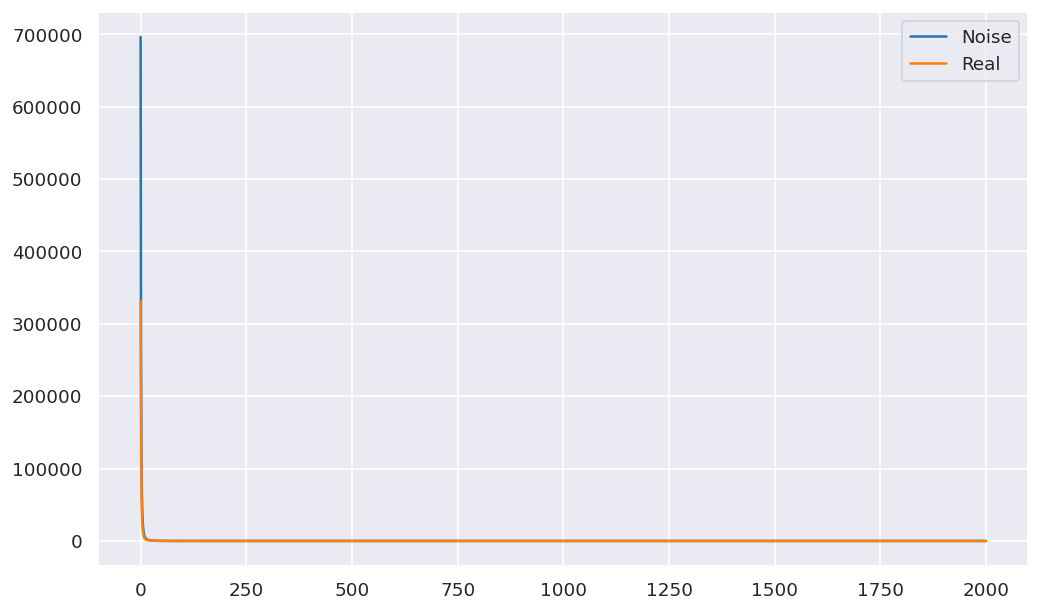

[array([ 1.53296799, -0.54260237, -4.68518582, ...,  2.84809262,
         2.89881879,  2.4249451 ]),
 array([ 0.36617305, -0.43714695, -3.27452759, ...,  2.08408681,
         3.32482055,  2.25315877]),
 array([ 0.09798511, -1.1810438 , -2.22162879, ...,  2.13564186,
         2.60912177,  1.94314876]),
 array([-0.05231592, -1.14569942, -2.11313035, ...,  1.93622482,
         1.93218838,  1.62842045]),
 array([-0.21773331, -1.37395205, -1.72340721, ...,  1.71362609,
         1.53309414,  1.23135804]),
 array([-0.40383313, -1.25969614, -1.51565205, ...,  1.25753738,
         1.29908298,  0.73764835]),
 array([-0.21869189, -1.0084272 , -1.45772468, ...,  1.07268829,
         0.97124912,  0.44376543]),
 array([-0.00910789, -0.75283309, -1.34081353, ...,  1.01210475,
         0.72780314,  0.24720637]),
 array([ 0.14356583, -0.58109048, -1.17500293, ...,  1.0111204 ,
         0.52764007,  0.24732457]),
 array([ 0.25198366, -0.40579291, -0.98184488, ...,  0.84625688,
         0.50900875,  0.19

In [16]:
nesterov_plot(2000)